# Data Cleaning
* Data cleaning is the process of detecting and correcting errors or inconsistencies in a dataset to improve its quality and reliability for analysis. It involves various steps such as handling missing or incorrect data, removing duplicates, standardizing formats, correcting typos, and dealing with outliers. The goal of data cleaning is to ensure that the dataset is accurate, complete, and consistent so that it can be used effectively for further analysis and modeling. This process is crucial in data preprocessing before any meaningful analysis or machine learning tasks can be performed on the data.

# Importing Libraries

In [118]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")


# Loading Dataset

In [2]:
df=pd.read_csv('AB_NYC_2019.csv')
df.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3506,2095959,Big Sunlit Studio - Nice Bed - 18 min to Manha...,10692401,Jp,Queens,Sunnyside,40.74409,-73.92471,Entire home/apt,94,7,27,2016-08-28,0.40,1,0
2926,1690764,One very large room two beds,8925493,Yvonne,Brooklyn,Bedford-Stuyvesant,40.68208,-73.91040,Private room,65,3,2,2019-05-07,0.06,2,365
31281,24287857,Astoria Centeral Location,183211776,Rafael,Queens,Astoria,40.76387,-73.90995,Private room,79,1,73,2019-06-30,5.03,4,171
5095,3662827,Nolita Duplex w/ private terrace,8200795,Brooke,Manhattan,Nolita,40.72168,-73.99544,Entire home/apt,191,3,51,2019-06-30,0.88,1,55
20128,16122223,Superb master bedroom on the Upper West Side,3740293,Paolo,Manhattan,Upper West Side,40.78859,-73.97568,Private room,60,14,1,2017-05-23,0.04,1,0
26346,20991910,Beautifully Designed Green Point in Greenpoint,4774053,Rinat,Brooklyn,Greenpoint,40.72588,-73.94531,Entire home/apt,145,3,23,2019-06-04,1.06,1,13
21939,17645939,Vintage Rainbow Room,103361884,Ebony,Brooklyn,Flatbush,40.65140,-73.96160,Private room,44,3,25,2019-06-30,1.78,1,3
27463,21638538,Spacious Private bedroom & private bathroom,130201799,Karma,Manhattan,SoHo,40.72440,-73.99884,Private room,169,3,31,2019-06-30,1.54,1,69
27337,21577773,Private Room on Ground Floor close to Everything,154965091,Joe,Manhattan,Hell's Kitchen,40.76914,-73.98757,Private room,125,2,61,2019-05-17,3.02,4,95
18048,14135904,Zen Bed/Bath in Historic Harlem,63361875,Elisa,Manhattan,Harlem,40.81667,-73.94342,Private room,75,3,6,2017-05-21,0.17,1,0


# Data Exploration and cleaning

In [3]:
df.shape   #This dataset contain 48895 rows and 16 columns

(48895, 16)

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
df.duplicated().sum() # There are no duplicates

0

In [6]:
df.info() # as we can see apart of last_review all the columns are in correct format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# changing last_review to datetime format
df['last_review'] = pd.to_datetime(df['last_review'], format="%Y-%m-%d", errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [9]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
df[df['name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaT,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaT,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaT,NaN,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaT,NaN,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaT,NaN,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaT,NaN,5,0


# Finding and replacing Replacing name

In [11]:
 df[(df['neighbourhood_group']=='Manhattan')& (df['neighbourhood']=='Battery Park City')]['name'].mode()[0]

'***Lux Doorman/Furnished,Battery Park ***'

In [12]:
 df[(df['neighbourhood_group']=='Manhattan')& (df['neighbourhood']=='East Village')]['name'].mode()[0]

'Cozy East Village Apartment'

In [13]:
 df[(df['neighbourhood_group']=='Manhattan')& (df['neighbourhood']=='Greenwich Village')]['name'].mode()[0]

'Art Deco Charm in the heart of The Village!'

In [14]:
 df[(df['neighbourhood_group']=='Manhattan')& (df['neighbourhood']=='Nolita')]['name'].mode()[0]

'Private room in Prime Soho/Nolita location'

In [15]:
 df[(df['neighbourhood_group']=='Brooklyn')& (df['neighbourhood']=='Williamsburg')]['name'].mode()[0]

'Private room in Williamsburg'

In [16]:
 df[(df['neighbourhood_group']=='Brooklyn')& (df['neighbourhood']=='Bushwick')]['name'].mode()[0]

'Bushwick Oasis'

In [17]:
 df[(df['neighbourhood_group']=='Manhattan')& (df['neighbourhood']=='Washington Heights')]['name'].mode()[0]

'HARLEM, NEW YORK WELCOMES YOU!!'

In [18]:
 df[(df['neighbourhood_group']=='Manhattan')& (df['neighbourhood']=="Hell's Kitchen")]['name'].mode()[0]

'Cozy apartment by Central Park'

In [19]:
 df[(df['neighbourhood_group']=='Manhattan')& (df['neighbourhood']=='Harlem')]['name'].mode()[0]

'Harlem Gem'

In [20]:
 df[(df['neighbourhood_group']=='Manhattan')& (df['neighbourhood']=='Chinatown')]['name'].mode()[0]

'(= RENT ME RENT ME =)'

In [21]:
 df[(df['neighbourhood_group']=='Bronx')& (df['neighbourhood']=='Fordham')]['name'].mode()[0]

'Quarto Bronx (NY)'

In [22]:
 df[(df['neighbourhood_group']=='Brooklyn')& (df['neighbourhood']=='Brownsville')]['name'].mode()[0]

'686 A home away from home'

In [23]:
 df[(df['neighbourhood_group']=='Manhattan')& (df['neighbourhood']=='Upper West Side')]['name'].mode()[0]

'Upper West Side Studio'

In [24]:
 df[(df['neighbourhood_group']=='Brooklyn')& (df['neighbourhood']=='Bedford-Stuyvesant')]['name'].mode()[0]

'20-25 minutes to downtown NYC/30-40 to midtown'

# Replacing

In [25]:
df.loc[2854,'name']='***Lux Doorman/Furnished,Battery Park ***'

In [26]:
df.loc[3703,'name']='Cozy East Village Apartment'

In [27]:
df.loc[5775,'name']='Art Deco Charm in the heart of The Village!'

In [28]:
df.loc[5975,'name']='Private room in Prime Soho/Nolita location'

In [29]:
df.loc[5975,'name']='Private room in Prime Soho/Nolita location'

In [30]:
df.loc[6269,'name']='Private room in Williamsburg'

In [31]:
df.loc[6567,'name']='Bushwick Oasis'

In [32]:
df.loc[6605,'name']='HARLEM, NEW YORK WELCOMES YOU!!'

In [33]:
df.loc[8841,'name']='Private room in Williamsburg'

In [34]:
df.loc[11963,'name']='Cozy apartment by Central Park'

In [35]:
df.loc[12824,'name']='Harlem Gem'

In [36]:
df.loc[13059,'name']='(= RENT ME RENT ME =)'

In [37]:
df.loc[13401,'name']='686 A home away from home'

In [38]:
df.loc[15819,'name']='Upper West Side Studio'

In [39]:
df.loc[16071,'name']='Quarto Bronx (NY)'

In [40]:
df.loc[18047,'name']='20-25 minutes to downtown NYC/30-40 to midtown'

In [41]:
df.loc[28889,'name']='Bushwick Oasis'

# finding and replacing host names


In [42]:
df[df['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaT,NaN,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaT,NaN,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


In [43]:
 df[(df['neighbourhood_group']=='Queens')& (df['neighbourhood']=='Queens Village')]['host_name'].mode()[0]

'DuChess'

In [44]:
df.loc[360,'host_name']='DuChess'

In [45]:
 df[(df['neighbourhood_group']=='Brooklyn')& (df['neighbourhood']=='Flatbush')]['host_name'].mode()[0]

'Elizabeth'

In [46]:
df.loc[2700,'host_name']='Elizabeth'

In [47]:
 df[(df['neighbourhood_group']=='Manhattan')& (df['neighbourhood']=='Harlem')]['host_name'].mode()[0]

'David'

In [48]:
df.loc[5745,'host_name']='David'

In [49]:
 df[(df['neighbourhood_group']=='Brooklyn')& (df['neighbourhood']=='Crown Heights')]['host_name'].mode()[0]

'Alex'

In [50]:
df.loc[6075,'host_name']='Alex'

In [51]:
 df[(df['neighbourhood_group']=='Brooklyn')& (df['neighbourhood']=='Greenpoint')]['host_name'].mode()[0]

'Vida'

In [52]:
df.loc[6582,'host_name']='Vida'

In [53]:
df[(df['neighbourhood_group']=='Brooklyn')& (df['neighbourhood']=='East Flatbush')]['host_name'].mode()[0]

'Stat'

In [54]:
df.loc[8163,'host_name']='Stat'

In [55]:
df[(df['neighbourhood_group']=='Brooklyn')& (df['neighbourhood']=='Bushwick')]['host_name'].mode()[0]

'Sergii'

In [56]:
df.loc[8257,'host_name']='Sergii'

In [57]:
df.loc[8852,'host_name']='Stat'

In [58]:
df[(df['neighbourhood_group']=='Brooklyn')& (df['neighbourhood']=='Williamsburg')]['host_name'].mode()[0]

'Michael'

In [59]:
df.loc[9138,'host_name']='Michael'

In [60]:
df.loc[9817,'host_name']='David'

In [61]:
df.loc[14040,'host_name']='Vida'

In [62]:
 df[(df['neighbourhood_group']=='Queens')& (df['neighbourhood']=='Ditmars Steinway')]['host_name'].mode()[0]

'Freda'

In [63]:
df.loc[14631,'host_name']='Freda'

In [64]:
 df[(df['neighbourhood_group']=='Manhattan')& (df['neighbourhood']=='Chelsea')]['host_name'].mode()[0]

'Blueground'

In [65]:
df.loc[15174,'host_name']='Blueground'

In [66]:
 df[(df['neighbourhood_group']=='Bronx')& (df['neighbourhood']=='Highbridge')]['host_name'].mode()[0]

'Nahuel'

In [67]:
df.loc[19565,'host_name']='Nahuel'

In [68]:
 df[(df['neighbourhood_group']=='Manhattan')& (df['neighbourhood']=='Upper East Side')]['host_name'].mode()[0]

'Yaacov'

In [69]:
df.loc[27777,'host_name']='Yaacov'

In [70]:
 df[(df['neighbourhood_group']=='Manhattan')& (df['neighbourhood']=="Hell's Kitchen")]['host_name'].mode()[0]

'John'

In [71]:
df.loc[27962,'host_name']='John'

In [72]:
df.loc[28042,'host_name']='John'

In [73]:
df.loc[28274,'host_name']='John'

In [74]:
 df[(df['neighbourhood_group']=='Manhattan')& (df['neighbourhood']=="East Harlem")]['host_name'].mode()[0]

'Abraham'

In [75]:
df.loc[30570,'host_name']='Abraham'

In [76]:
 df[(df['neighbourhood_group']=='Manhattan')& (df['neighbourhood']=='Upper West Side')]['host_name'].mode()[0]

'Emily'

In [77]:
df.loc[32193,'host_name']='Emily'


In [78]:
df.loc[38992,'host_name']='Elizabeth'

# Now dealing with last_review , reviews_per_month 

In [79]:
df[df['reviews_per_month'].isnull()].shape

(10052, 16)

In [80]:
df['last_review'].fillna(method='ffill', inplace=True)

In [81]:
df['reviews_per_month'].fillna(0, inplace=True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48895 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48895 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [83]:
# All the columns in the dataset have correct DType and have zero null values

In [84]:
df.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2021,894063,"Penthouse patio,city view,BIG bed",1803302,Lacey,Brooklyn,Williamsburg,40.71216,-73.96326,Private room,98,3,78,2019-05-27,1.01,1,268
19449,15513127,Brooklyn Apartment,62644193,Elle,Brooklyn,East Flatbush,40.64335,-73.92981,Private room,70,1,0,2018-10-17,0.00,1,157
47419,35718849,PRIVACY CHELSEA BEAUTY WITH PRIVATE ENTRANCE,14563616,Anna/Phillip,Manhattan,Chelsea,40.73724,-73.99429,Entire home/apt,249,1,5,2019-07-01,5.00,2,125
10955,8456825,Bushwick Oasis,44516268,Tom And Claudia,Brooklyn,Bushwick,40.70337,-73.93071,Entire home/apt,70,2,171,2019-06-22,3.74,1,183
39581,30812751,Double Double Room · Empire CIty New York,224414117,Gabriel,Manhattan,Hell's Kitchen,40.75467,-73.99657,Private room,199,1,4,2019-01-20,0.61,30,363
9382,7195202,Sunny central Wmsburg Apartment,2902496,Craig,Brooklyn,Williamsburg,40.71130,-73.94249,Entire home/apt,99,1,2,2015-11-29,0.04,1,0
10370,7936698,"Spacious, sunny bedroom next to Prospect Park!",2128535,Lily,Brooklyn,Prospect-Lefferts Gardens,40.66020,-73.96246,Private room,50,3,5,2017-01-14,0.11,1,0
17253,13650422,Convenient Financial District Studio,2486611,Jem,Manhattan,Financial District,40.70884,-74.00754,Entire home/apt,130,2,15,2018-05-31,0.42,1,0
15978,12916073,10 min from JFK and 30min to NYC,70827984,Digna,Brooklyn,East New York,40.66921,-73.87797,Entire home/apt,123,4,63,2019-06-03,1.67,1,67
2851,1614817,PRIME apartment in East Village!,5283853,Chara,Manhattan,East Village,40.73082,-73.98693,Entire home/apt,160,2,44,2018-01-01,0.64,2,0


# Detecting outliers

In [113]:
# Plotting boxplot for (price, minimum_nights,number_of_reviews,reviews_per_month, calculated_host_listings_count) to detect outliers

In [114]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,2018-10-14 06:10:06.540546304,1.090910,7.143982,112.781327
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,2018-07-31 00:00:00,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,2019-05-25 00:00:00,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2019-06-24 00:00:00,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,NaN,1.597283,32.952519,131.622289


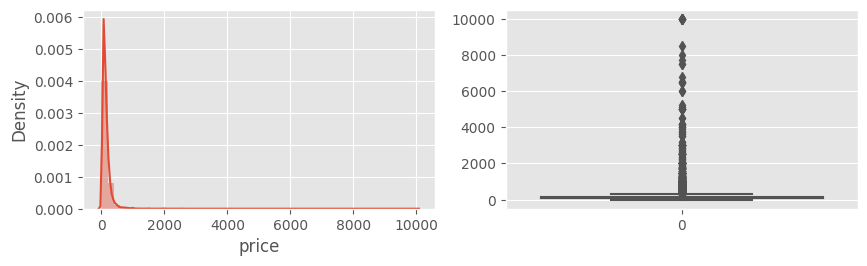

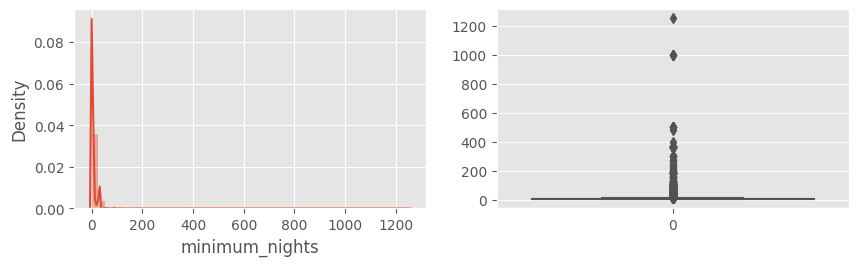

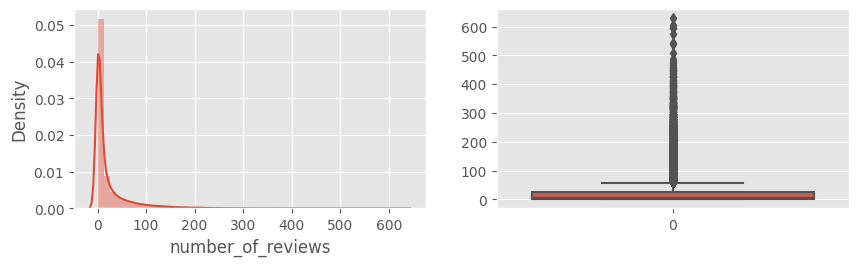

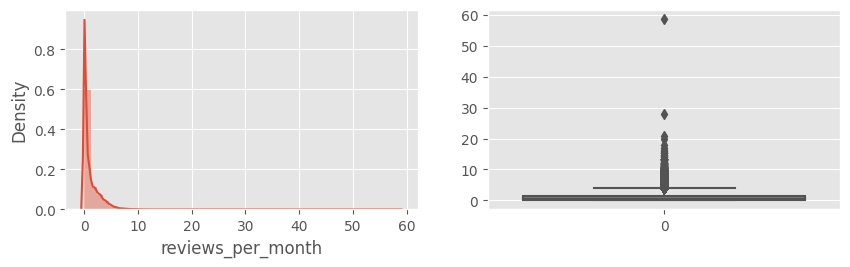

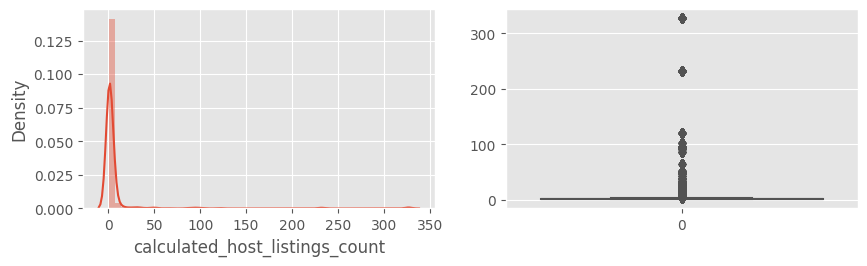

In [115]:
plt.figure(figsize=(10,15))
plt.subplot(5,2,1)
sns.distplot(df['price'])

plt.subplot(5,2,2)
sns.boxplot(df['price'])

plt.figure(figsize=(10,15))
plt.subplot(5,2,3)
sns.distplot(df['minimum_nights'])

plt.subplot(5,2,4)
sns.boxplot(df['minimum_nights'])

plt.figure(figsize=(10,15))
plt.subplot(5,2,5)
sns.distplot(df['number_of_reviews'])

plt.subplot(5,2,6)
sns.boxplot(df['number_of_reviews'])

plt.figure(figsize=(10,15))
plt.subplot(5,2,7)
sns.distplot(df['reviews_per_month'])

plt.subplot(5,2,8)
sns.boxplot(df['reviews_per_month'])

plt.figure(figsize=(10,15))
plt.subplot(5,2,9)
sns.distplot(df['calculated_host_listings_count'])

plt.subplot(5,2,10)
sns.boxplot(df['calculated_host_listings_count'])

plt.show()

In [87]:
# with the help of box plot we can see  price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count contain outliers

# Removing outliers with IQR method

In [88]:
new_df=df.copy()

In [89]:
# Now wee are using IQR approach to deal with outliers.
# Q1= 25th percentile
# Q3 = 75th percentile
# IQR=Q3-Q1
# where lower limit is Q1-1.5*IQR and upper limit is Q3+ 1.5* IQR 

In [90]:
def range(data, variables):
    Q1= data[variables].quantile(.25)
    Q3= data[variables].quantile(.75)
    IQR= Q3-Q1
    lower_range= Q1 - 1.5*IQR
    upper_range= Q3 + 1.5* IQR 
    
    return lower_range, upper_range

In [91]:
lower_price, upper_price=range(new_df, 'price')
print("lower_price:", lower_price)
print("upper_price:", upper_price)

lower_price: -90.0
upper_price: 334.0


In [92]:
lower_minimum_nights, upper_minimum_nights=range(new_df, 'minimum_nights')
print("lower_minimum_nights:", lower_minimum_nights)
print("upper_minimum_nights:", upper_minimum_nights)

lower_minimum_nights: -5.0
upper_minimum_nights: 11.0


In [93]:
lower_number_of_reviews, upper_number_of_reviews=range(new_df, 'number_of_reviews')
print("lower_number_of_reviews:", lower_number_of_reviews)
print("upper_number_of_reviews:", upper_number_of_reviews)

lower_number_of_reviews: -33.5
upper_number_of_reviews: 58.5


In [94]:
lower_reviews_per_month, upper_reviews_per_month=range(new_df, 'reviews_per_month')
print("lower_reviews_per_month:", lower_reviews_per_month)
print("upper_reviews_per_month:", upper_reviews_per_month)

lower_reviews_per_month: -2.27
upper_reviews_per_month: 3.89


In [95]:
lower_calculated_host_listings_count, upper_calculated_host_listings_count=range(new_df, 'calculated_host_listings_count')
print("lower_calculated_host_listings_count:", lower_calculated_host_listings_count)
print("upper_calculated_host_listings_count:", upper_calculated_host_listings_count)

lower_calculated_host_listings_count: -0.5
upper_calculated_host_listings_count: 3.5


# Capping variable at upper and lower limit

In [96]:
new_df['price']=np.where(new_df['price']>upper_price,upper_price, np.where(new_df['price']<lower_price, lower_price, new_df['price']))

In [97]:
new_df['minimum_nights']=np.where(new_df['minimum_nights']>upper_minimum_nights,upper_minimum_nights, np.where(new_df['minimum_nights']<lower_minimum_nights, lower_minimum_nights, new_df['minimum_nights']))

In [98]:
new_df['number_of_reviews']=np.where(new_df['number_of_reviews']>upper_number_of_reviews,upper_number_of_reviews, np.where(new_df['number_of_reviews']<lower_number_of_reviews, lower_number_of_reviews, new_df['number_of_reviews']))

In [99]:
new_df['reviews_per_month']=np.where(new_df['reviews_per_month']>upper_reviews_per_month,upper_reviews_per_month, np.where(new_df['reviews_per_month']<lower_reviews_per_month, lower_reviews_per_month, new_df['reviews_per_month']))

In [100]:
new_df['calculated_host_listings_count']=np.where(new_df['calculated_host_listings_count']>upper_calculated_host_listings_count,upper_calculated_host_listings_count, np.where(new_df['calculated_host_listings_count']<lower_calculated_host_listings_count, lower_calculated_host_listings_count, new_df['calculated_host_listings_count']))

In [101]:
new_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.00000,48895.00000,48895,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,132.979753,3.82532,15.67419,2018-10-14 06:10:06.540546304,0.986579,1.614920,112.781327
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.00000,0.00000,2011-03-28 00:00:00,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.00000,1.00000,2018-07-31 00:00:00,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.00000,5.00000,2019-05-25 00:00:00,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.00000,24.00000,2019-06-24 00:00:00,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,334.000000,11.00000,58.50000,2019-07-08 00:00:00,3.890000,3.500000,365.000000
std,1.098311e+07,7.861097e+07,0.054530,0.046157,83.530504,3.32072,20.34953,NaN,1.238206,0.946883,131.622289


# Replacing those values which are zero with column mean

In [111]:
#after checking the summary statistics of the dataset i found that the min value is zero which is not right so i am replacing the value with column mean.
price_mean=new_df['price'].mean()
new_df['price']=new_df['price'].replace(0, price_mean)

In [112]:
# the same is with availability 365 column because the minimum value cannot be zero so i am replacing the value with the column mean 
availability_365_mean=new_df['availability_365'].mean()
new_df['availability_365']=new_df['availability_365'].replace(0, availability_365_mean)

In [104]:
new_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.00000,48895.00000,48895,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,133.009669,3.82532,15.67419,2018-10-14 06:10:06.540546304,0.986579,1.614920,153.222988
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.00000,0.00000,2011-03-28 00:00:00,0.000000,1.000000,1.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.00000,1.00000,2018-07-31 00:00:00,0.040000,1.000000,100.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.00000,5.00000,2019-05-25 00:00:00,0.370000,1.000000,112.781327
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.00000,24.00000,2019-06-24 00:00:00,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,334.000000,11.00000,58.50000,2019-07-08 00:00:00,3.890000,3.500000,365.000000
std,1.098311e+07,7.861097e+07,0.054530,0.046157,83.506681,3.32072,20.34953,NaN,1.238206,0.946883,105.487952


# Plotting distplot and boxplot before and after removing outliers for price and minimum nights

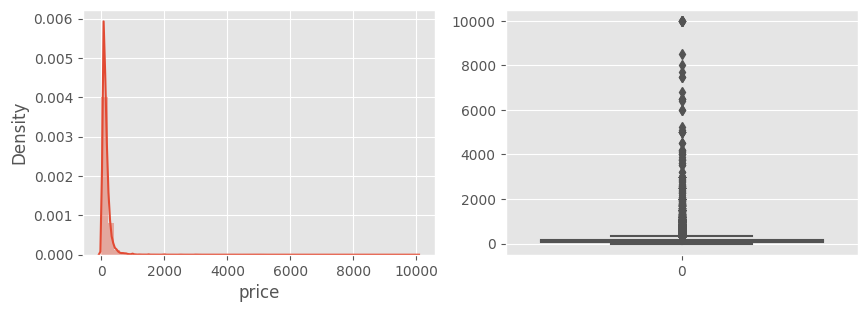

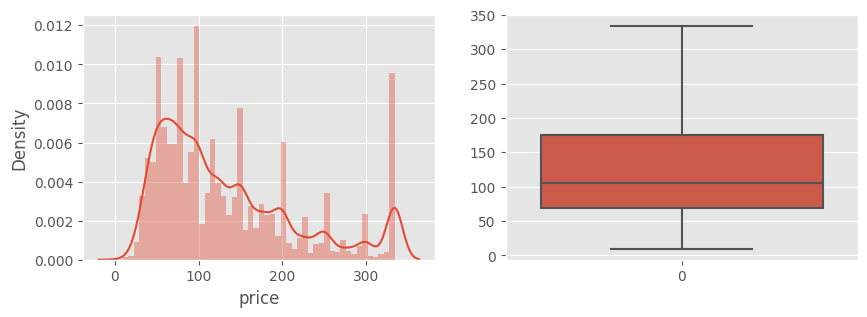

Price skewness before removing outlier : 19.118938995046033
Price skewness after removing outlier: 1.023479639367661


In [105]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.distplot(df['price'])

plt.subplot(2,2,2)
sns.boxplot(df['price'])

plt.figure(figsize=(10,7))
plt.subplot(2,2,3)
sns.distplot(new_df['price'])

plt.subplot(2,2,4)
sns.boxplot(new_df['price'])

plt.show()
print('Price skewness before removing outlier :',df['price'].skew())
print('Price skewness after removing outlier:',new_df['price'].skew())

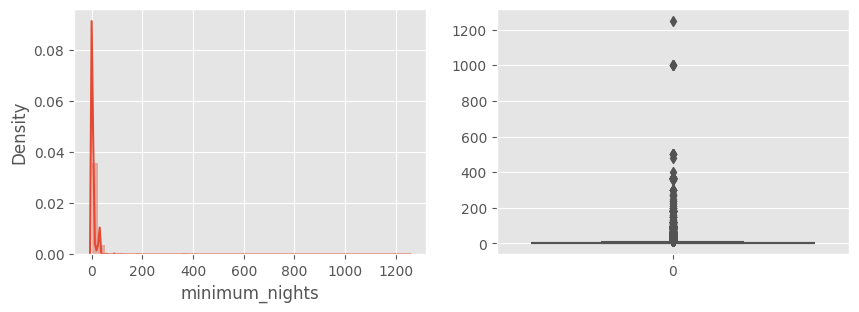

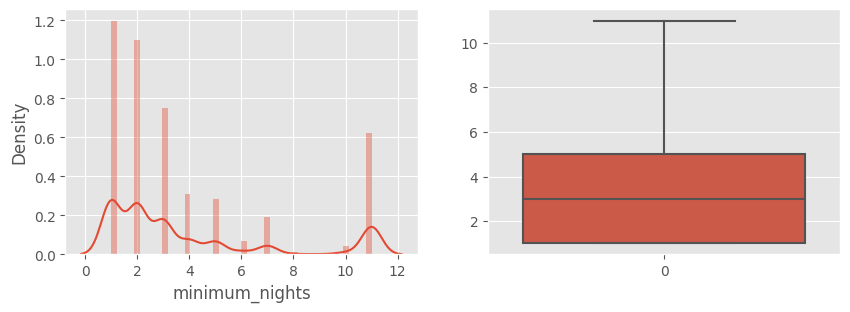

Minimum_nights skewness before removing outlier : 21.827274529642168
Minimum_nights skewness after removing outlier : 1.2861165892722501


In [116]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.distplot(df['minimum_nights'])

plt.subplot(2,2,2)
sns.boxplot(df['minimum_nights'])

plt.figure(figsize=(10,7))
plt.subplot(2,2,3)
sns.distplot(new_df['minimum_nights'])

plt.subplot(2,2,4)
sns.boxplot(new_df['minimum_nights'])

plt.show()

print('Minimum_nights skewness before removing outlier :',df['minimum_nights'].skew())
print('Minimum_nights skewness after removing outlier :',new_df['minimum_nights'].skew())

In [117]:
# As we can see from the above plot we have outlier free data

In [108]:
new_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,3.5,365.000000
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.000000
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,2019-05-21,0.00,1.0,365.000000
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,58.5,2019-07-05,3.89,1.0,194.000000
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,112.781327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2.0,0.0,2019-07-08,0.00,2.0,9.000000
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4.0,0.0,2019-07-08,0.00,2.0,36.000000
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10.0,0.0,2019-07-08,0.00,1.0,27.000000
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1.0,0.0,2019-07-08,0.00,3.5,2.000000


In [109]:
new_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.00000,48895.00000,48895,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,133.009669,3.82532,15.67419,2018-10-14 06:10:06.540546304,0.986579,1.614920,153.222988
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.00000,0.00000,2011-03-28 00:00:00,0.000000,1.000000,1.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.00000,1.00000,2018-07-31 00:00:00,0.040000,1.000000,100.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.00000,5.00000,2019-05-25 00:00:00,0.370000,1.000000,112.781327
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.00000,24.00000,2019-06-24 00:00:00,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,334.000000,11.00000,58.50000,2019-07-08 00:00:00,3.890000,3.500000,365.000000
std,1.098311e+07,7.861097e+07,0.054530,0.046157,83.506681,3.32072,20.34953,NaN,1.238206,0.946883,105.487952


# Data Cleaning steps

1. Importing important Libraries.
2. Loading Dataset.
3. Data exploration and Missing Data Handling: Dealing with missing values by either imputing them or making informed decisions on how to handle gaps in the dataset..
* Checking and fixing data types, Looking for null and duplicates values.
* Columns which contain missing text data like 'name' and 'hostname' was replaced with the mode of the name/hostname on the basis of their neighbourhood_group and neighbourhood.
* Replacing the null values on 'reviews_per_month' with zero and using ffill on datetime column 'last_review' to fill the null values.
4. Standardization: Consistent formatting and units across the dataset for accurate analysis.
5. Outlier Detection: Identifying and addressing outliers that may skew analysis or model performance.
* Using Boxplot and IQR method to indentify and remove or either replace the outliers with the lower and upper range.

# Thank you